Main parts of deep learning tasks

- Data preparation
- Model building (CNN in this case)
- Model training
- Model evaluation

## Importing necessary packages

In [ ]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import cv2
from glob import glob
import os
import pandas as pd
from sklearn.utils import shuffle
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import torch.nn.functional as F
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# devices
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Device: ", device)

Device:  cuda


## Getting dataset

In [ ]:
!gdown https://figshare.com/ndownloader/files/30871912 -O /content/NWPU_RESISC45-20210923T210241Z-001.zip

Downloading...
From: https://figshare.com/ndownloader/files/30871912
To: /content/NWPU_RESISC45-20210923T210241Z-001.zip
100% 148M/148M [00:07<00:00, 19.4MB/s]


In [ ]:
!unzip -q /content/NWPU_RESISC45-20210923T210241Z-001.zip -d /content/

In [ ]:
Data_files = glob("/content/NWPU_RESISC45/*")
Data_files

['/content/NWPU_RESISC45/River',
 '/content/NWPU_RESISC45/Flyover',
 '/content/NWPU_RESISC45/Dense Residential',
 '/content/NWPU_RESISC45/Game Space',
 '/content/NWPU_RESISC45/Beach',
 '/content/NWPU_RESISC45/Storage Cisterns',
 '/content/NWPU_RESISC45/Anchorage',
 '/content/NWPU_RESISC45/Farm',
 '/content/NWPU_RESISC45/Airfield',
 '/content/NWPU_RESISC45/Parking Space',
 '/content/NWPU_RESISC45/Sparse Residential',
 '/content/NWPU_RESISC45/Forest']

In [ ]:
os.path.splitext(os.path.basename(Data_files[4]))[0]

'Beach'

In [ ]:
Img_path, label, label_name = [], [],[]
label_dict={}
for i,label_path in enumerate(Data_files):
  for val in glob(f"{label_path}/*"):
    Img_path = Img_path+[val]
    label = label+[i]
    label_name=label_name+[os.path.splitext(os.path.basename(label_path))[0]]
    label_dict[os.path.splitext(os.path.basename(label_path))[0]]=i


In [ ]:
# label_name

In [ ]:
len(Img_path), len(label)

(10500, 10500)

In [ ]:
# Creating a dataframe to keep both images and lebel
data_dict={"File_path":Img_path, "label":label, "label_name":label_name}
data_df = pd.DataFrame(data_dict)
data_df

,File_path,label,label_name
0,/content/NWPU_RESISC45/River/img0578.jpg,0,River
1,/content/NWPU_RESISC45/River/img0310.jpg,0,River
2,/content/NWPU_RESISC45/River/img0296.jpg,0,River
3,/content/NWPU_RESISC45/River/img0153.jpg,0,River
4,/content/NWPU_RESISC45/River/img0443.jpg,0,River
...,...,...,...
10495,/content/NWPU_RESISC45/Forest/img0602.jpg,11,Forest
10496,/content/NWPU_RESISC45/Forest/img0019.jpg,11,Forest
10497,/content/NWPU_RESISC45/Forest/img0337.jpg,11,Forest
10498,/content/NWPU_RESISC45/Forest/img0411.jpg,11,Forest


In [ ]:
random.seed(10)
data_df = shuffle(data_df).reset_index(drop=True)
data_df

,File_path,label,label_name
0,/content/NWPU_RESISC45/Sparse Residential/img0...,10,Sparse Residential
1,/content/NWPU_RESISC45/Sparse Residential/img0...,10,Sparse Residential
2,/content/NWPU_RESISC45/Storage Cisterns/img012...,5,Storage Cisterns
3,/content/NWPU_RESISC45/Game Space/img01373.jpg,3,Game Space
4,/content/NWPU_RESISC45/Sparse Residential/img0...,10,Sparse Residential
...,...,...,...
10495,/content/NWPU_RESISC45/Beach/img0209.jpg,4,Beach
10496,/content/NWPU_RESISC45/Flyover/img0136.jpg,1,Flyover
10497,/content/NWPU_RESISC45/River/img0106.jpg,0,River
10498,/content/NWPU_RESISC45/Flyover/img0172.jpg,1,Flyover


In [ ]:
# check info
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   File_path   10500 non-null  object
 1   label       10500 non-null  int64 
 2   label_name  10500 non-null  object
dtypes: int64(1), object(2)
memory usage: 246.2+ KB


In [ ]:
# Splitting into traing and test dataset
train_imgs, val_imgs, train_labels, val_labels = train_test_split(data_df["File_path"], data_df["label"],\
                                                                    test_size=0.3, random_state=42)


assert len(train_imgs)==len(train_labels)

len(train_imgs), len(val_imgs)

(7350, 3150)

In [ ]:
train_imgs=pd.DataFrame(train_imgs).reset_index(drop=True)
val_imgs=pd.DataFrame(val_imgs).reset_index(drop=True)
train_labels=pd.DataFrame(train_labels).reset_index(drop=True)
val_labels=pd.DataFrame(val_labels).reset_index(drop=True)
train_imgs

,File_path
0,/content/NWPU_RESISC45/Beach/img0362.jpg
1,/content/NWPU_RESISC45/Farm/img0878.jpg
2,/content/NWPU_RESISC45/Farm/img01257.jpg
3,/content/NWPU_RESISC45/Flyover/img0374.jpg
4,/content/NWPU_RESISC45/Farm/img0696.jpg
...,...
7345,/content/NWPU_RESISC45/River/img0246.jpg
7346,/content/NWPU_RESISC45/Game Space/img0820.jpg
7347,/content/NWPU_RESISC45/Airfield/img0376.jpg
7348,/content/NWPU_RESISC45/Parking Space/img0574.jpg


## Let's visualize


In [ ]:
random_idx = np.random.randint(low=0,high=len(train_imgs)-1,size=6)
random_idx

array([ 902, 7164, 2288, 1718,  891, 2326])

In [ ]:
# Classes
label_dict

{'River': 0,
 'Flyover': 1,
 'Dense Residential': 2,
 'Game Space': 3,
 'Beach': 4,
 'Storage Cisterns': 5,
 'Anchorage': 6,
 'Farm': 7,
 'Airfield': 8,
 'Parking Space': 9,
 'Sparse Residential': 10,
 'Forest': 11}

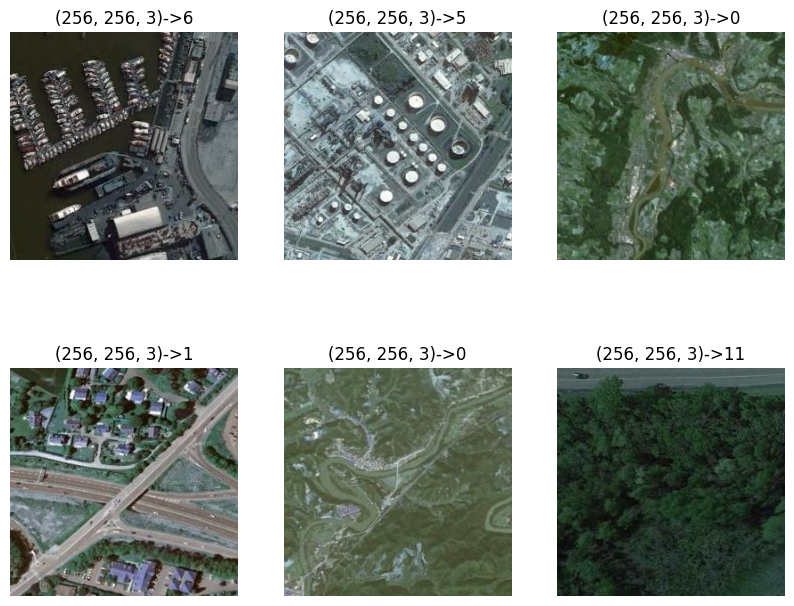

In [ ]:
# visualize
nrows=2
ncols=3
fig, ax=plt.subplots(nrows=nrows, ncols=ncols,figsize=(10,8))
i=0
for row in range(0,nrows):
    for col in range(0,ncols):
        img=cv2.imread(train_imgs["File_path"][random_idx[i]])
        ax[row][col].imshow(img)
        ax[row][col].set_title(f'{img.shape}->{train_labels["label"][random_idx[i]]}')
        ax[row][col].axis(False)
        i+=1


## Dataset preparation  and building a data loader

In [ ]:
class TrainDataset(Dataset):
    def __init__(self, img_list, label_list):
        self.img_s = img_list
        self.label_s = label_list

    def __len__(self):
        return len(self.img_s)

    def __getitem__(self, idx):
        image = self.img_s[idx]
        label = self.label_s[idx]

        image = torch.from_numpy(cv2.imread(image))

        image = image.permute(2,0,1)


        return image, label

In [ ]:
class ValDataset(Dataset):
    def __init__(self, img_list, label_list):
        self.img_s = img_list
        self.label_s = label_list

    def __len__(self):
        return len(self.img_s)

    def __getitem__(self, idx):
        image = self.img_s[idx]
        label = self.label_s[idx]

        image = torch.from_numpy(cv2.imread(image))

        image = image.permute(2,0,1)


        return image, label

In [ ]:
# Creating data
Train_data = TrainDataset(train_imgs["File_path"],train_labels["label"])
val_data = ValDataset(val_imgs["File_path"],val_labels["label"])
f"Len of train dataset: {len(Train_data)}->shape of image at idx 0: {Train_data[0][0].shape}->Labelt:{Train_data[0][1]}"

'Len of train dataset: 7350->shape of image at idx 0: torch.Size([3, 256, 256])->Labelt:4'

In [ ]:
batch = 32

# Data loading
train_loader = DataLoader(
    dataset     = Train_data,
    batch_size  = batch,
    shuffle     = True
)

val_loader = DataLoader(
    dataset     = val_data,
    batch_size  = batch,
    shuffle     = False
)

In [ ]:
# Check data loaders
f"Train batchs: {len(train_loader)}, Test batches: {len(val_loader)}"

'Train batchs: 230, Test batches: 99'

In [ ]:
for i, data in enumerate(train_loader):
    img, labels = data
    print(img.shape, labels.shape)
    break

torch.Size([32, 3, 256, 256]) torch.Size([32])


In [ ]:
for i, data in enumerate(val_loader):
    img,labels = data
    print(img.shape,labels.shape)
    break

torch.Size([32, 3, 256, 256]) torch.Size([32])


## Building model architecture

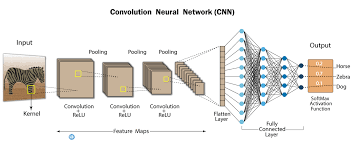

In [ ]:
class CNN_Net(nn.Module):
    def __init__(self,
               class_num: int):
      super().__init__()
      self.conv_block_1=nn.Sequential(
          nn.Conv2d(in_channels=3,
                  out_channels=64,
                  kernel_size=3,
                  stride=1,
                  padding=1
                  ),
          nn.BatchNorm2d(64),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2,
                     stride=2), # the default stridevalue is same as kernel_size

          nn.Conv2d(in_channels=64,
                  out_channels=64,
                  kernel_size=3,
                  stride=1,
                  padding=1),
          nn.BatchNorm2d(64),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2,
                     stride=2)
          )
      self.conv_block_2=nn.Sequential(
        nn.Conv2d(in_channels=64,
                  out_channels=128,
                  kernel_size=3,
                  stride=1,
                  padding=1
                  ),
        nn.BatchNorm2d(128),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2),

        nn.Conv2d(in_channels=128,
                  out_channels=128,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.BatchNorm2d(128),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
        )
      self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=16*16*128,
                  out_features=class_num)
        )

    def forward(self,x):
      out=self.conv_block_1(x)

      out=self.conv_block_2(out)

      out=self.classifier(out)

      prob = F.softmax(out, dim=1)

      return prob

⛹:::

<font color="red">TODO</font>:

1. construct your model that has the following conditions: the final convolution layer outputs [C H W]-> [256 8 8] and in include two hidden layers in classifier layer. Addionally, print the model summary and discuss the results of the model summary based on the built architecture.

2. Show calculations of how image deminsion changed from [3 256 256] to [256 8 8] for the entire convolution process.

<font color="red">NOTE</font>:

For simplity, for 2, you can upload the image of your calculations or do it in markdown

## Let's check the model output

In [ ]:
torch.manual_seed(42)
# Creating model object
model = CNN_Net(class_num=12).to(device)
model

CNN_Net(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine

In [ ]:
# Get the batch to test the model
one_batch = next(iter(train_loader))
my_batch = one_batch[0].to(device)
my_batch.shape,my_batch.dtype

(torch.Size([32, 3, 256, 256]), torch.uint8)

In [ ]:
# Testing the model with a single batch
model(my_batch.float())

tensor([[0.1254, 0.0923, 0.0337, 0.1574, 0.0799, 0.0405, 0.0407, 0.1430, 0.0622,
         0.0547, 0.1132, 0.0571],
        [0.1343, 0.1591, 0.0305, 0.0746, 0.0532, 0.0200, 0.0553, 0.1280, 0.1087,
         0.0862, 0.0405, 0.1097],
        [0.2550, 0.0588, 0.0326, 0.0331, 0.0526, 0.0461, 0.0831, 0.1050, 0.0802,
         0.0992, 0.0801, 0.0742],
        [0.0905, 0.0817, 0.0404, 0.0802, 0.1696, 0.0373, 0.0443, 0.1257, 0.0913,
         0.0895, 0.0566, 0.0928],
        [0.1631, 0.0517, 0.0525, 0.0643, 0.0979, 0.0414, 0.0895, 0.1557, 0.0650,
         0.0602, 0.0640, 0.0946],
        [0.1265, 0.0666, 0.0336, 0.0820, 0.1072, 0.0485, 0.0909, 0.1856, 0.0557,
         0.0518, 0.0779, 0.0736],
        [0.0373, 0.0243, 0.0289, 0.0946, 0.0360, 0.0071, 0.0477, 0.5610, 0.0376,
         0.0693, 0.0433, 0.0129],
        [0.1867, 0.0944, 0.0220, 0.0792, 0.0620, 0.0378, 0.0878, 0.1106, 0.1453,
         0.0748, 0.0643, 0.0351],
        [0.1689, 0.1672, 0.0324, 0.0823, 0.0631, 0.0427, 0.0460, 0.1203, 0.0990,

In [ ]:
# print model outputs to see the shapes at each layer

try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary
summary(model,input_size=(1,3,256,256))

Layer (type:depth-idx)                   Output Shape              Param #
CNN_Net                                  [1, 12]                   --
├─Sequential: 1-1                        [1, 64, 64, 64]           --
│    └─Conv2d: 2-1                       [1, 64, 256, 256]         1,792
│    └─BatchNorm2d: 2-2                  [1, 64, 256, 256]         128
│    └─ReLU: 2-3                         [1, 64, 256, 256]         --
│    └─MaxPool2d: 2-4                    [1, 64, 128, 128]         --
│    └─Conv2d: 2-5                       [1, 64, 128, 128]         36,928
│    └─BatchNorm2d: 2-6                  [1, 64, 128, 128]         128
│    └─ReLU: 2-7                         [1, 64, 128, 128]         --
│    └─MaxPool2d: 2-8                    [1, 64, 64, 64]           --
├─Sequential: 1-2                        [1, 128, 16, 16]          --
│    └─Conv2d: 2-9                       [1, 128, 64, 64]          73,856
│    └─BatchNorm2d: 2-10                 [1, 128, 64, 64]          256
│

In [ ]:
# Let's check number of trainable parameters

params=[par_um.numel() for par_um in model.parameters() if par_um.requires_grad==True]
sum(params)

654156

## Ready to train our model

In [ ]:
# For optimer and loss function
import torch.optim as optim

optimizer = optim.Adam(model.parameters(), lr=0.1)
criterion = torch.nn.CrossEntropyLoss()
scheduler =optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.95)

In [ ]:
def train(model, dataloader, optimizer, criterion):

    model.train()

    # Progress Bar
    batch_bar   = tqdm(total=len(dataloader), dynamic_ncols=True, leave=False, position=0, desc='Train', ncols=5)

    num_correct = 0
    total_loss  = 0

    for batch_idx, (images, target) in enumerate(dataloader):

        optimizer.zero_grad() # Zero gradients

        images, target = images.to(device), target.to(device)


        outputs = model(images.float())
        loss    = criterion(outputs, target)

        # Update correct predictions & loss
        num_correct     += int((torch.argmax(outputs, axis=1) == target).sum())
        total_loss      += float(loss.item())

        # tqdm - adding info to be checked on the progress bar
        batch_bar.set_postfix(
            acc         = f"{(100 * num_correct / (batch*(batch_idx + 1))):.04f}%",
            loss        = f"{total_loss / (batch_idx + 1):.04f}",
            num_correct = num_correct,
            lr          = f"{optimizer.param_groups[0]['lr']:.04f}"
        )

        batch_bar.update() # Update tqdm bar

    batch_bar.close() # close the tqdm bar after each epoch

    acc         = 100 * num_correct / (batch* len(dataloader))
    total_loss  = float(total_loss / len(dataloader))

    return acc, total_loss

In [ ]:
def validate(model, dataloader, criterion):

    model.eval()
    batch_bar = tqdm(total=len(dataloader), dynamic_ncols=True, position=0, leave=False, desc='Val', ncols=5)

    num_correct = 0.0
    total_loss = 0.0

    for batch_idx, (images, target) in enumerate(dataloader):

        # Move images to device
        images, target = images.to(device), target.to(device)

        # Get model outputs
        with torch.inference_mode():
            outputs = model(images.float())
            loss = criterion(outputs, target)

        num_correct += int((torch.argmax(outputs, axis=1) == target).sum())
        total_loss += float(loss.item())

        batch_bar.set_postfix(
            acc="{:.04f}%".format(100 * num_correct / (batch*(batch_idx + 1))),
            loss="{:.04f}".format(float(total_loss / (batch_idx + 1))),
            num_correct=num_correct)

        batch_bar.update()

    batch_bar.close()
    acc = 100 * num_correct / (batch* len(dataloader))
    total_loss = float(total_loss / len(dataloader))
    return acc, total_loss

In [ ]:
best_valAcc = 0.0 # Initialize the accuracy to help saving the best model

Epochs = 10
for epoch in range(Epochs):

    curr_lr = float(optimizer.param_groups[0]['lr'])

    train_acc, train_loss = train(model, train_loader, optimizer, criterion)

    print("\nEpoch {}/{}: \nTrain Acc {:.04f}%\t Train Loss {:.04f}\t Learning Rate {:.04f}".format(
        epoch + 1,
        Epochs,
        train_acc,
        train_loss,
        curr_lr))

    val_acc, val_loss = validate(model, val_loader, criterion)

    print("Val Acc {:.04f}%\t Val Loss {:.04f}".format(val_acc, val_loss))

    # learning rate scheduler, update
    scheduler.step()

    # Save the best model based on accuracy
    if val_acc >= best_valAcc:

        path = './checkpoint_m9.pth'
        print("Saving model")
        torch.save({'model_state_dict':model.state_dict(),
                  'optimizer_state_dict':optimizer.state_dict(),
                  'scheduler_state_dict':scheduler.state_dict(),
                  'val_acc': val_acc,
                  'epoch': epoch}, path)
        best_valAcc = val_acc





Epoch 1/10: 
Train Acc 10.2174%	 Train Loss 2.4799	 Learning Rate 0.1000


Val Acc 9.8485%	 Val Loss 2.4794
Saving model



Epoch 2/10: 
Train Acc 10.2310%	 Train Loss 2.4798	 Learning Rate 0.1000


Val Acc 9.8169%	 Val Loss 2.4794



Epoch 3/10: 
Train Acc 10.4484%	 Train Loss 2.4798	 Learning Rate 0.0950


Val Acc 9.7854%	 Val Loss 2.4794



Epoch 4/10: 
Train Acc 10.2038%	 Train Loss 2.4799	 Learning Rate 0.0950


Val Acc 9.8485%	 Val Loss 2.4794
Saving model



Epoch 5/10: 
Train Acc 10.2174%	 Train Loss 2.4799	 Learning Rate 0.0902


Val Acc 9.7222%	 Val Loss 2.4795



Epoch 6/10: 
Train Acc 10.0136%	 Train Loss 2.4798	 Learning Rate 0.0902


Val Acc 9.8169%	 Val Loss 2.4795



Epoch 7/10: 
Train Acc 10.1223%	 Train Loss 2.4798	 Learning Rate 0.0857


Val Acc 9.7222%	 Val Loss 2.4795



Epoch 8/10: 
Train Acc 10.4212%	 Train Loss 2.4799	 Learning Rate 0.0857


Val Acc 9.7222%	 Val Loss 2.4795



Epoch 9/10: 
Train Acc 10.1902%	 Train Loss 2.4798	 Learning Rate 0.0815


Val Acc 9.8485%	 Val Loss 2.4794
Saving model



Epoch 10/10: 
Train Acc 10.0136%	 Train Loss 2.4798	 Learning Rate 0.0815


Val Acc 9.8485%	 Val Loss 2.4795
Saving model
